In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=1.2
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
auto = pd.read_csv('adverts_clean.csv')

In [4]:
auto

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,year_listed,month_listed,...,standard_colour_Turquoise,standard_colour_Yellow,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Natural Gas,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
0,0.000000,0.972477,0.948586,1.0,1.000000,0.534990,0.8125,0.0,1.000000,0.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.439526,0.431193,0.951157,0.0,0.896552,0.303535,0.8750,0.0,1.000000,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.163863,0.834862,0.968295,0.0,0.965517,0.366788,0.8125,0.0,1.000000,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.316998,0.954128,0.601542,0.0,0.954023,0.315373,0.4375,0.0,1.000000,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.361505,0.495413,0.713796,0.0,0.942529,0.430279,0.8125,0.0,1.000000,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,0.140163,0.715596,0.035133,0.0,0.988506,0.340904,0.4375,0.0,1.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402001,0.442182,0.715596,0.005141,0.0,0.873563,0.198354,0.4375,0.0,1.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402002,0.336392,0.660550,0.683805,0.0,0.908046,0.306647,0.8125,0.0,1.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402003,0.181767,0.018349,0.107969,0.0,0.942529,0.348372,0.4375,0.0,1.000000,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


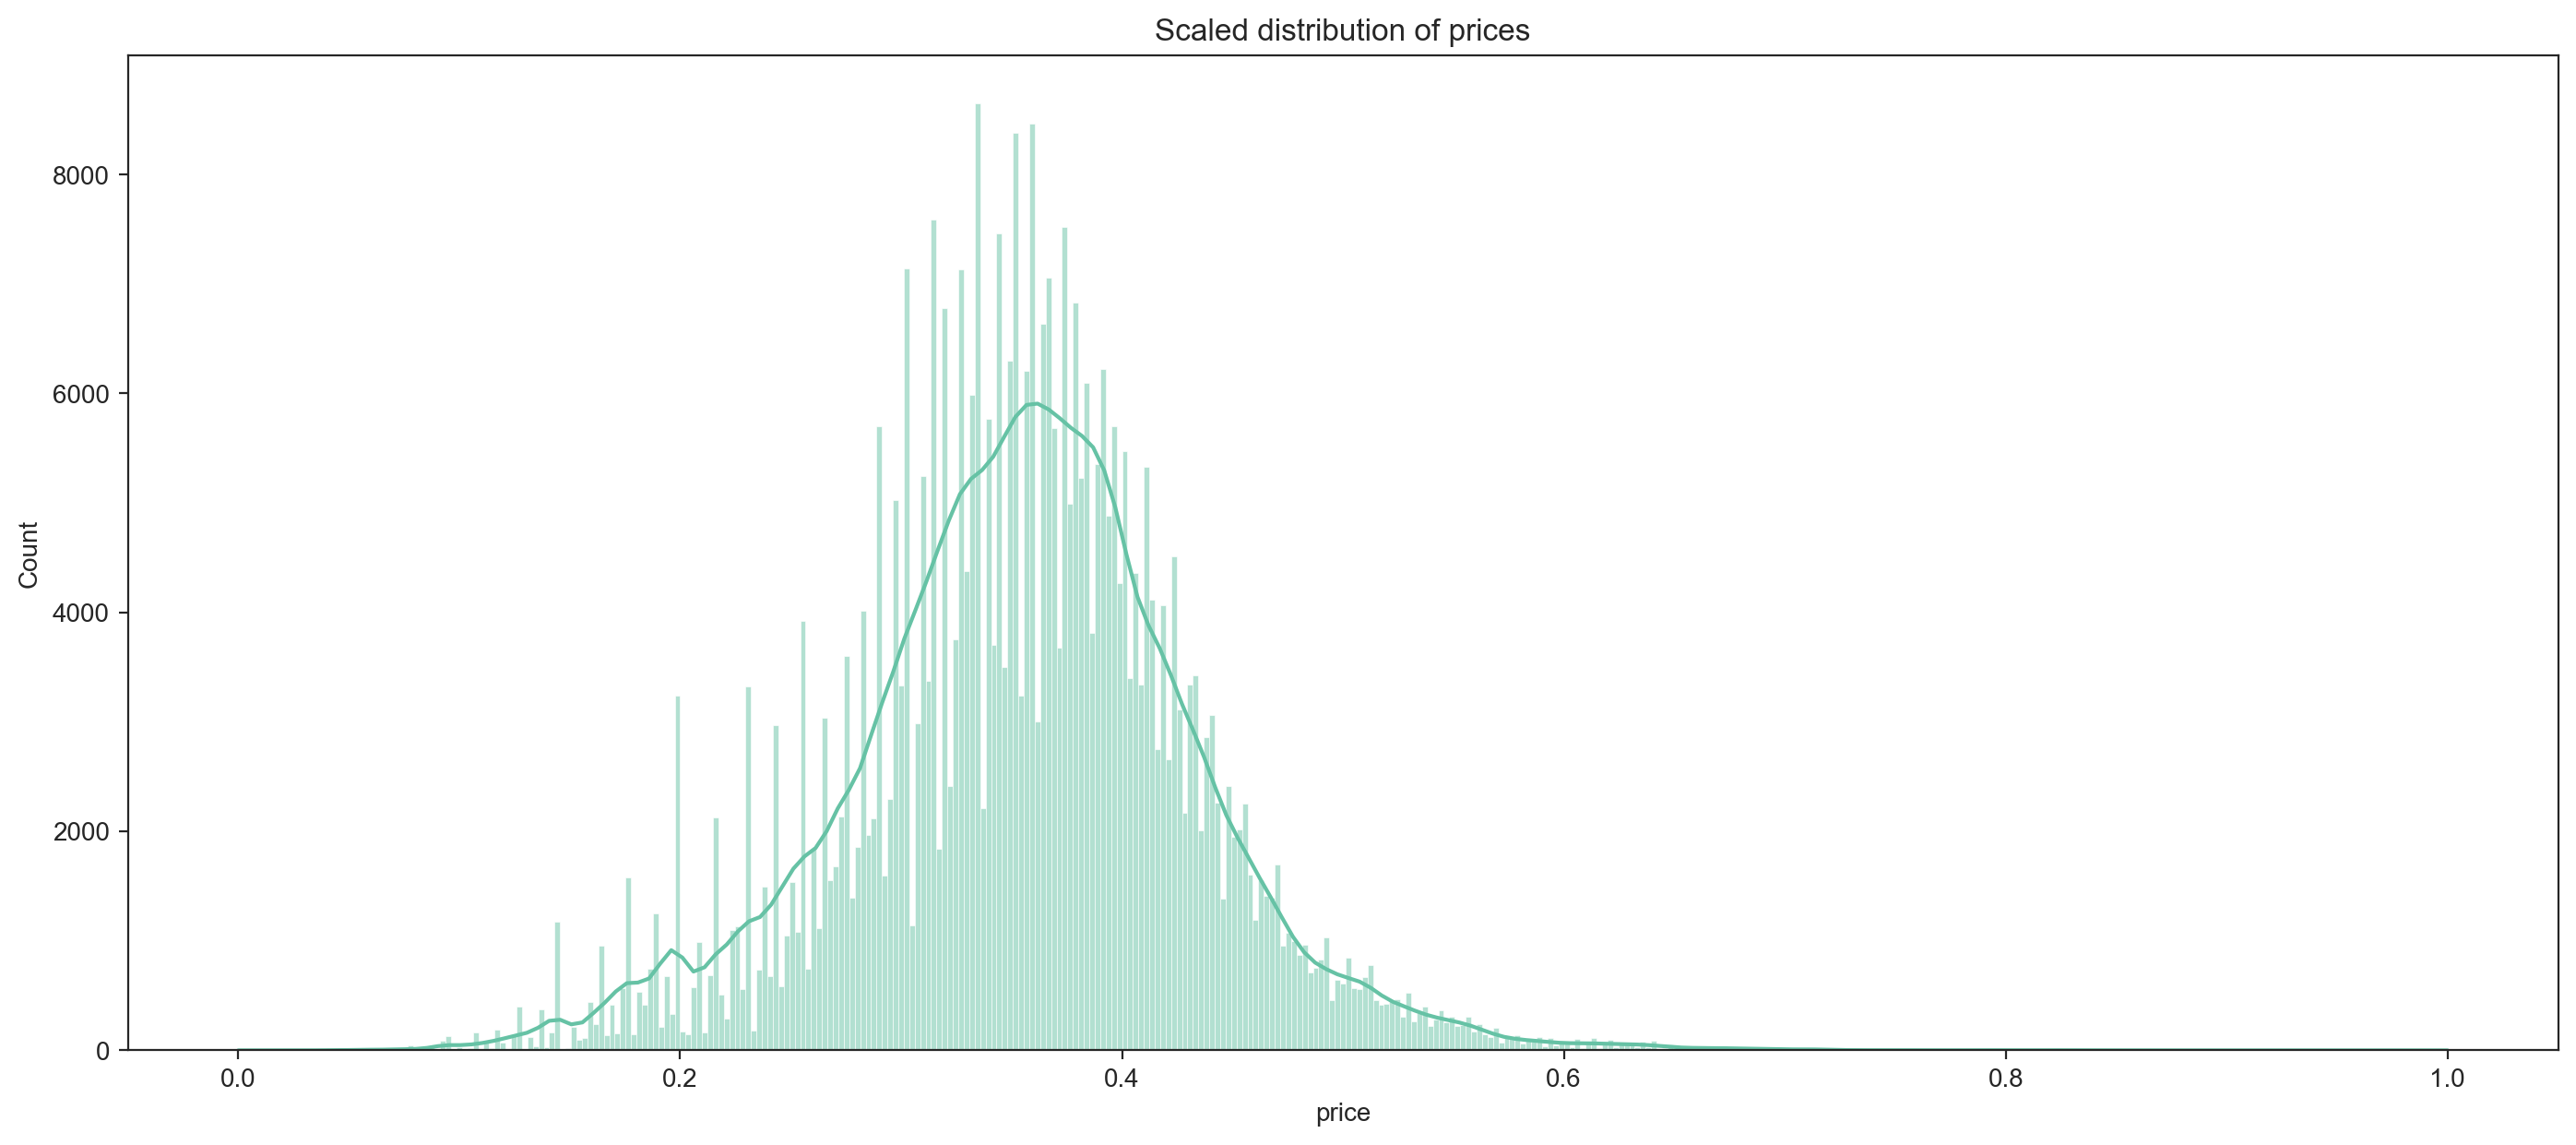

In [10]:
sns.histplot(auto, x="price", kde=True);
plt.title("Scaled distribution of prices");

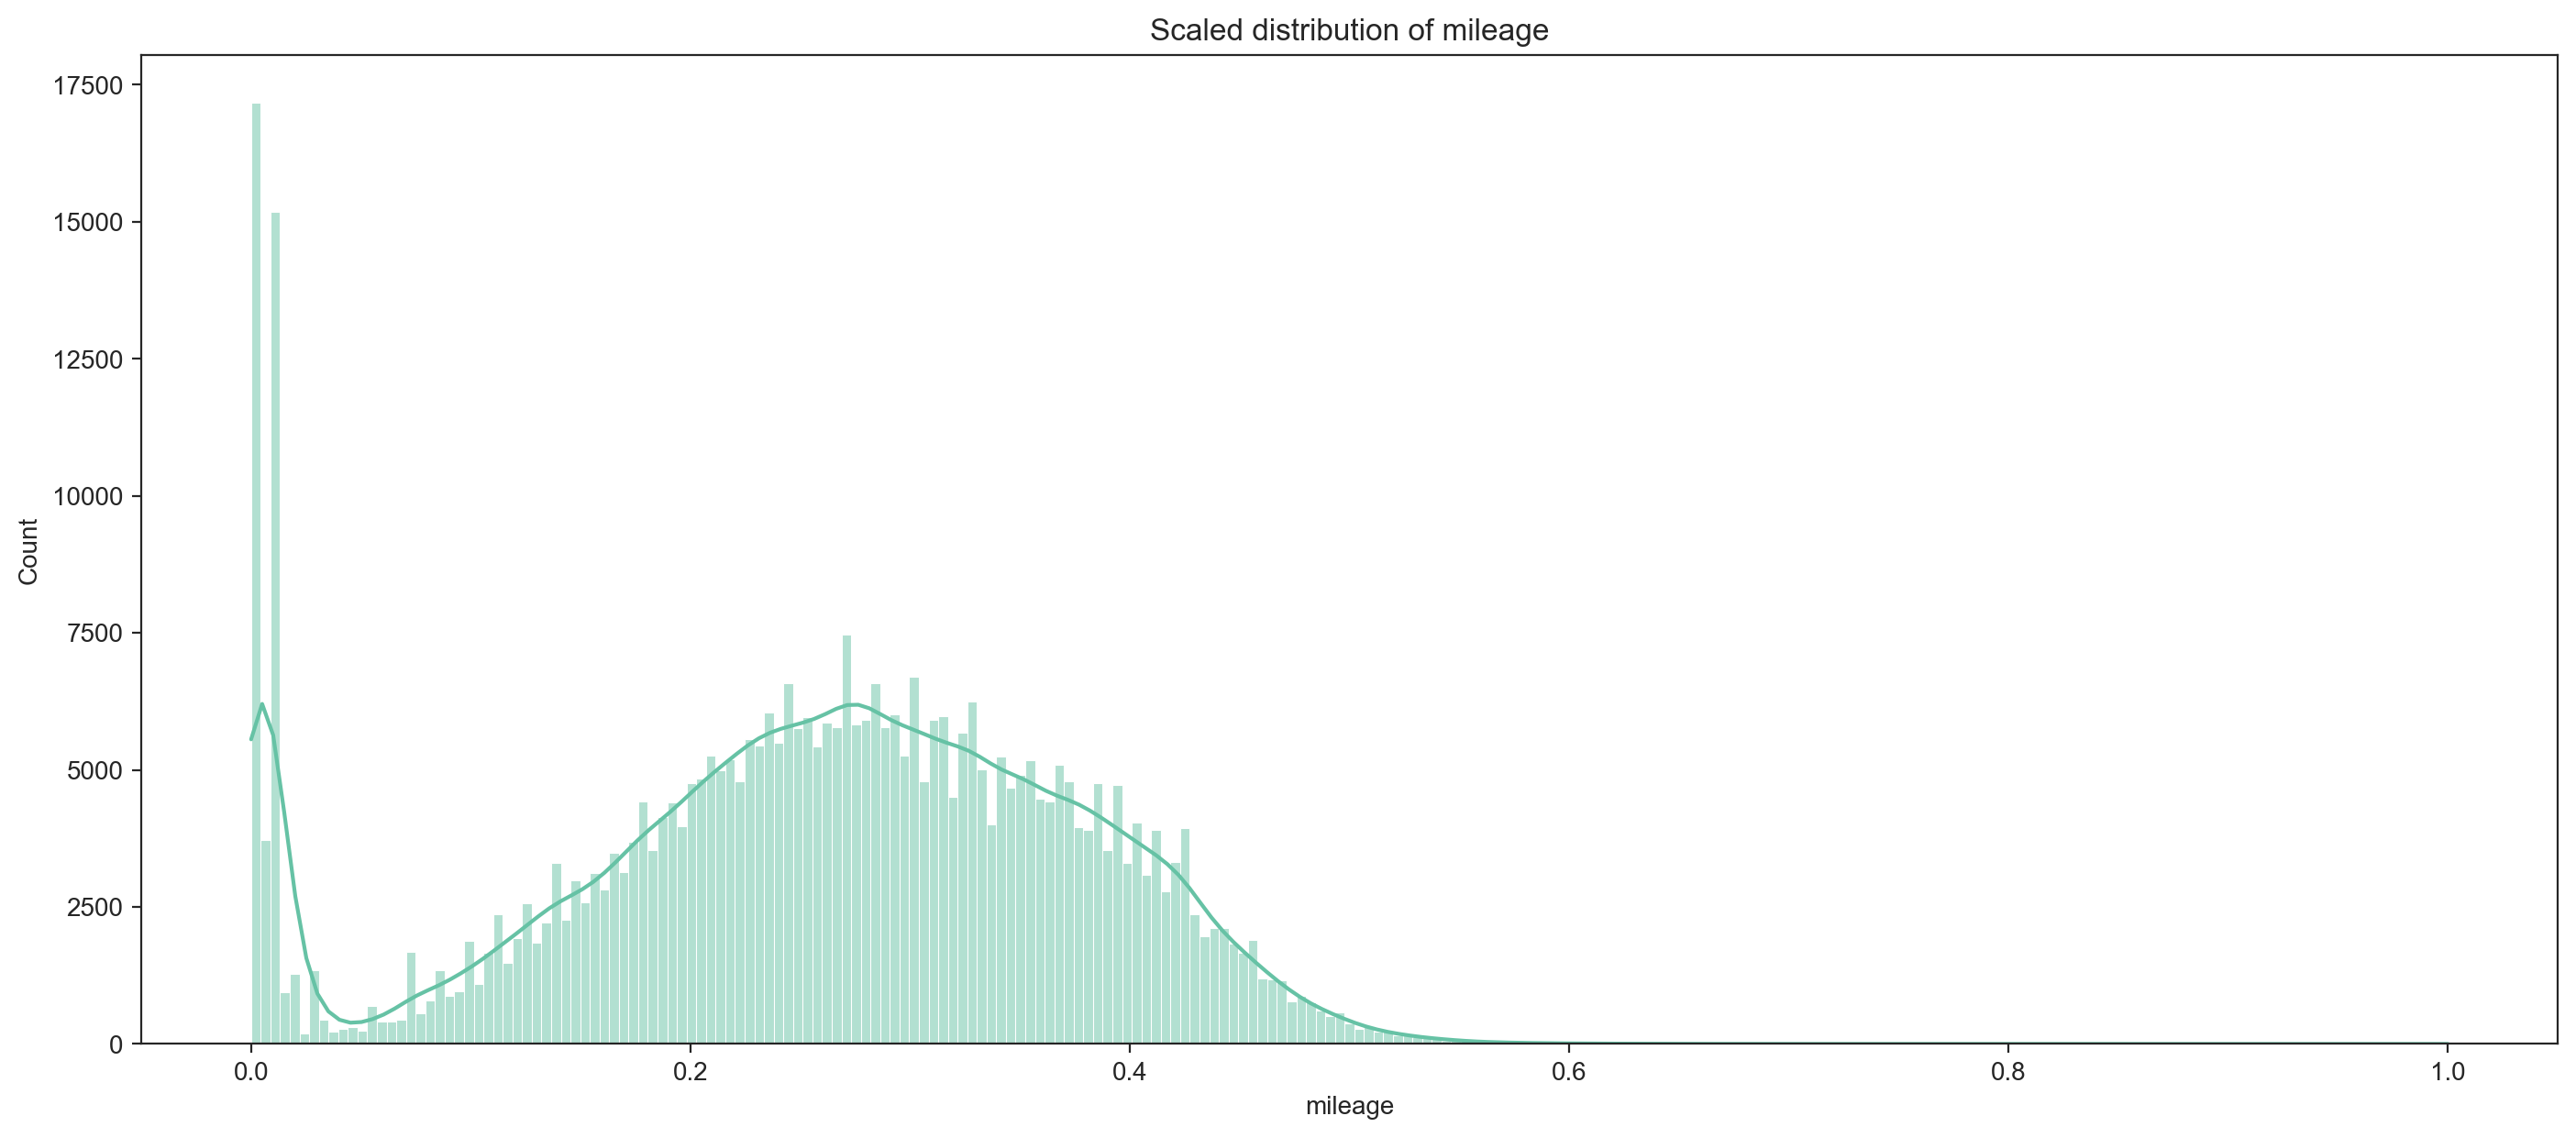

In [12]:
sns.histplot(auto, x="mileage", kde=True);
plt.title("Scaled distribution of mileage");

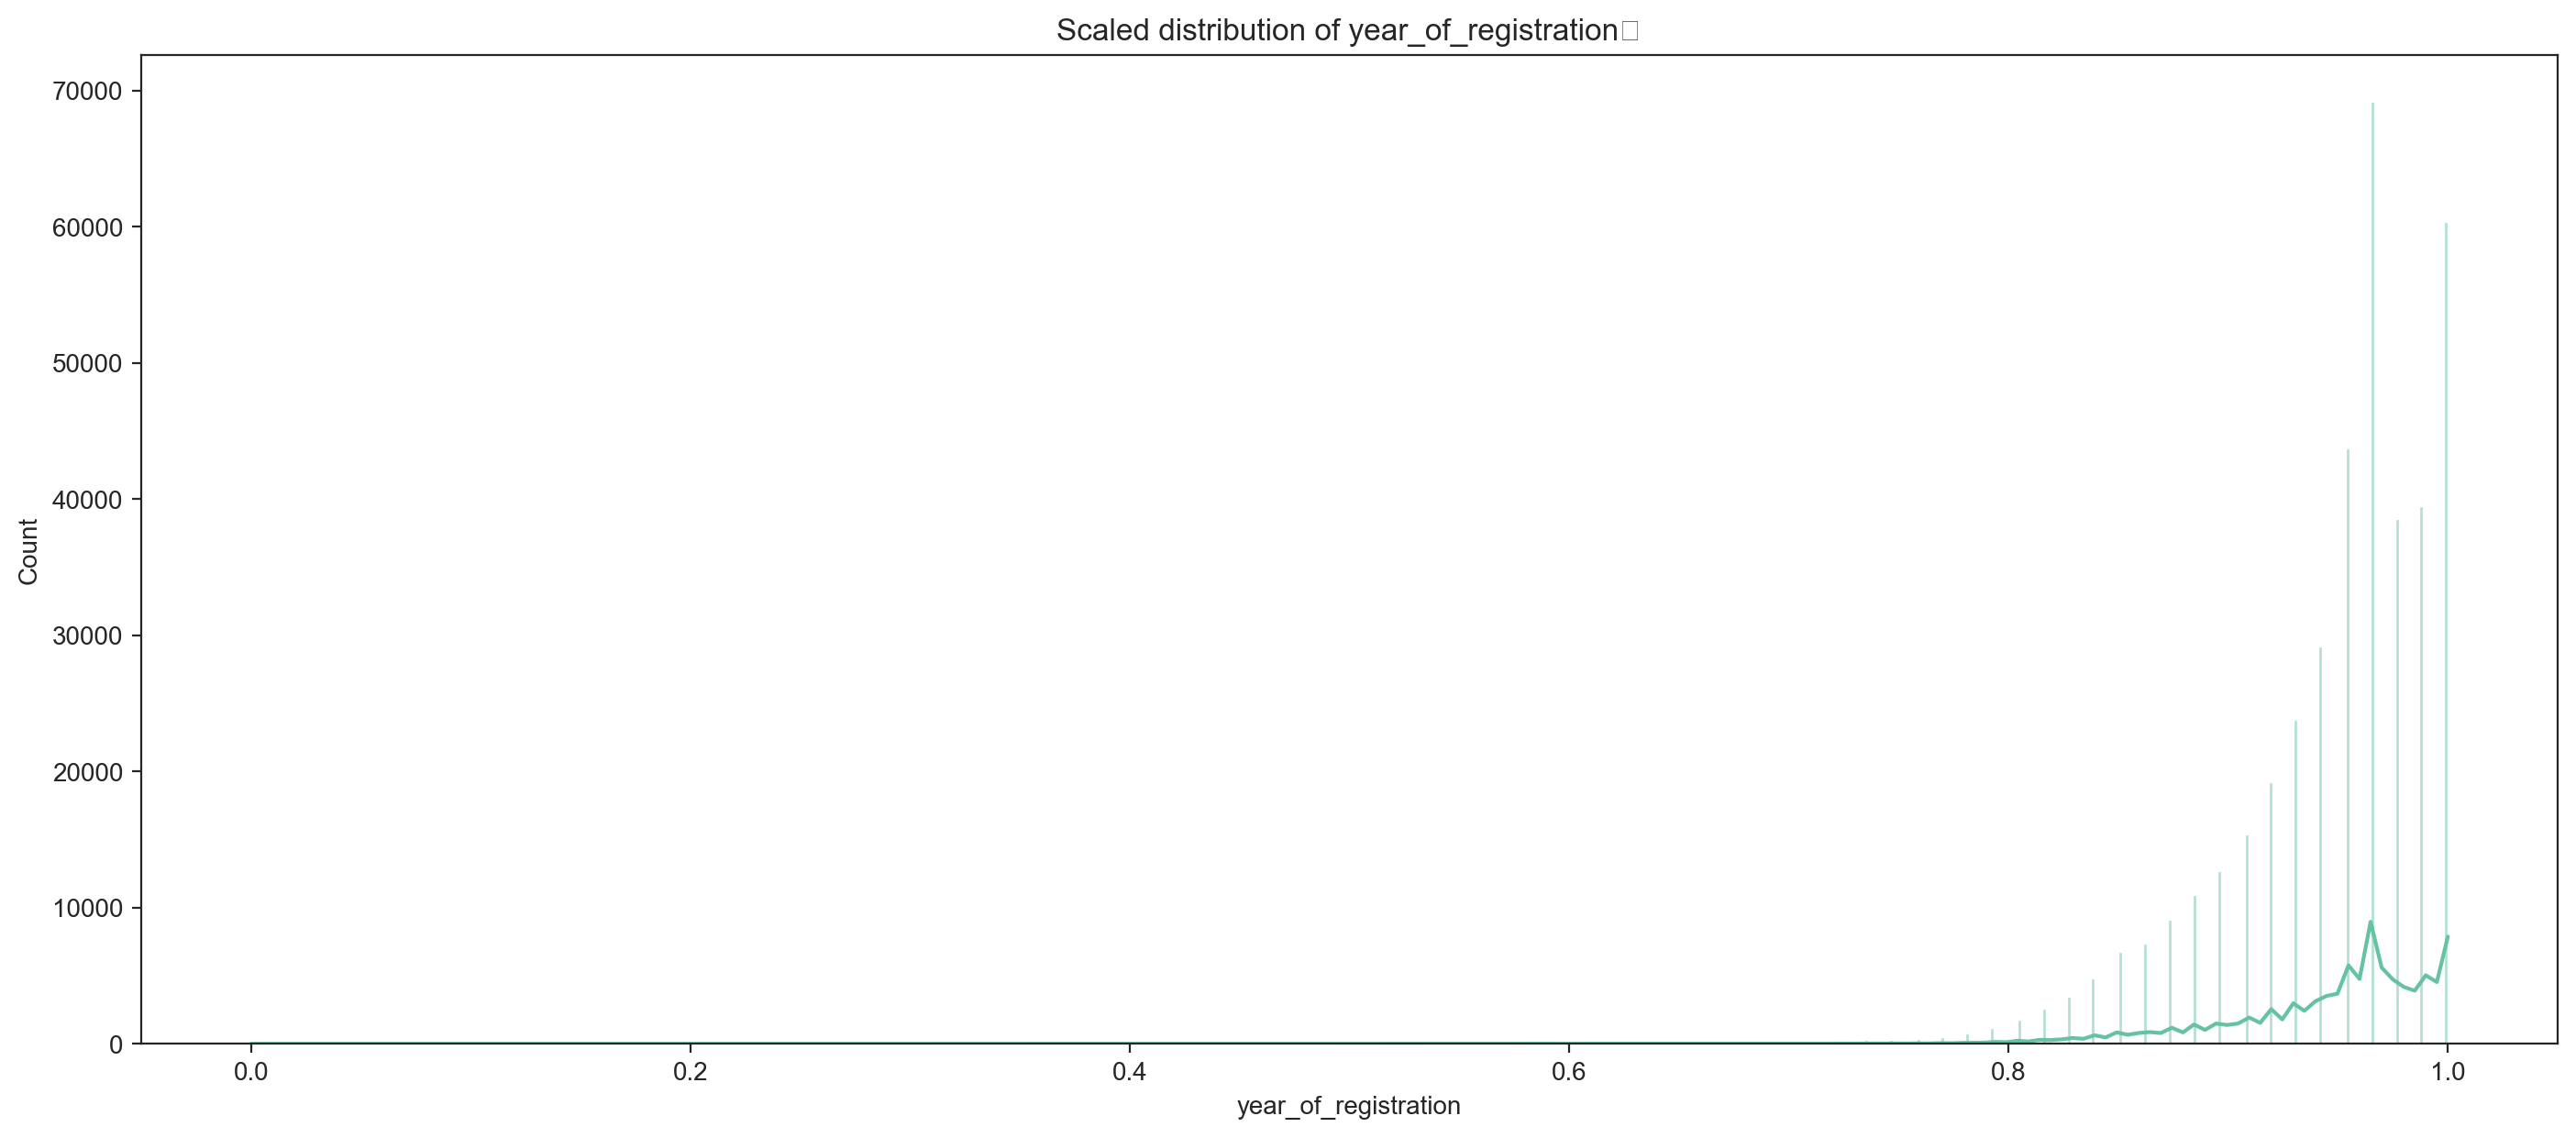

In [13]:
sns.histplot(auto, x="year_of_registration", kde=True);
plt.title("Scaled distribution of year_of_registration	");